In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Path to your CSV file
file_path = '/content/7967dd9e-ce25-4a3f-83f3-6436994e851a.csv'

# Load the CSV file
data = pd.read_csv(file_path, delimiter=';')

# Creating separate DataFrames for each tradable instrument: Amethysts and Starfruit
amethysts_data = data[data['product'] == 'AMETHYSTS'].copy()
starfruit_data = data[data['product'] == 'STARFRUIT'].copy()

# Setting the 'timestamp' column as the index and keeping only the required columns
amethysts_data.set_index('timestamp', inplace=True)
starfruit_data.set_index('timestamp', inplace=True)

amethysts_data = amethysts_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]
starfruit_data = starfruit_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]

starfruit_data.to_csv('starfruit.csv')
amethysts_data.to_csv('amethysts.csv')

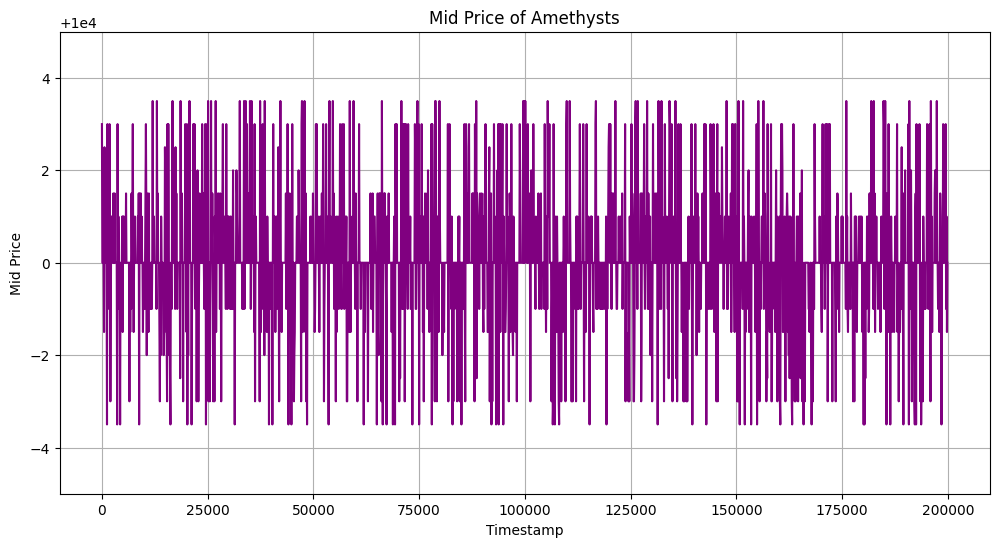

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(amethysts_data.index, amethysts_data['mid_price'], color='purple')
plt.title('Mid Price of Amethysts')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.ylim(9995, 10005)  # Setting the y-axis limits to start at 0 and end a bit above the max value
plt.grid(True)
plt.show()

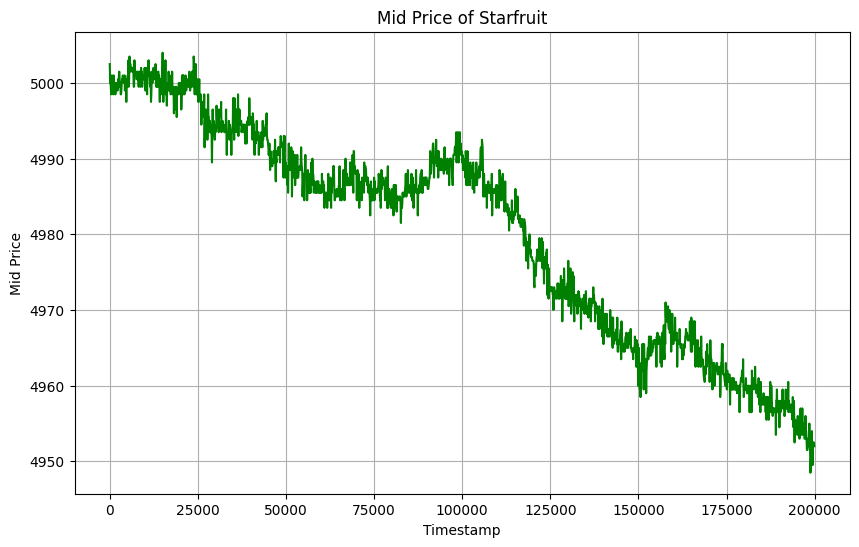

In [5]:
# Plot for Starfruit
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['mid_price'], color='green')
plt.title('Mid Price of Starfruit')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

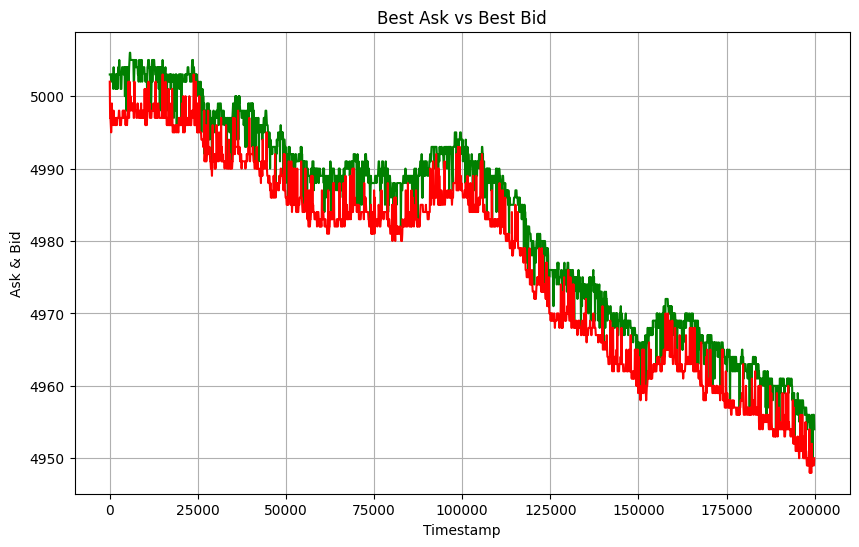

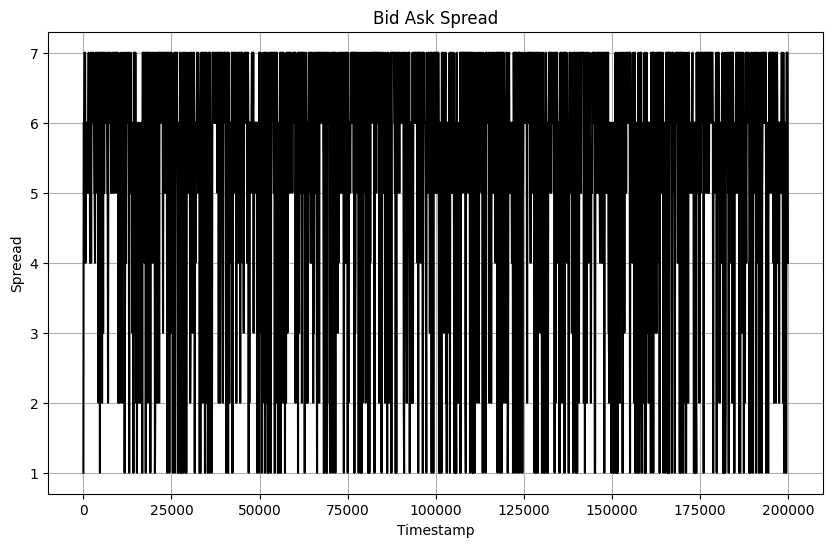

In [6]:
best_ask = starfruit_data['ask_price_1']
best_bid = starfruit_data['bid_price_1']
bid_ask_spread = best_ask - best_bid
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1'], color='red')
plt.title('Best Ask vs Best Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, bid_ask_spread, color='black')
plt.title('Bid Ask Spread')
plt.xlabel('Timestamp')
plt.ylabel('Spreead')
plt.grid(True)
plt.show()

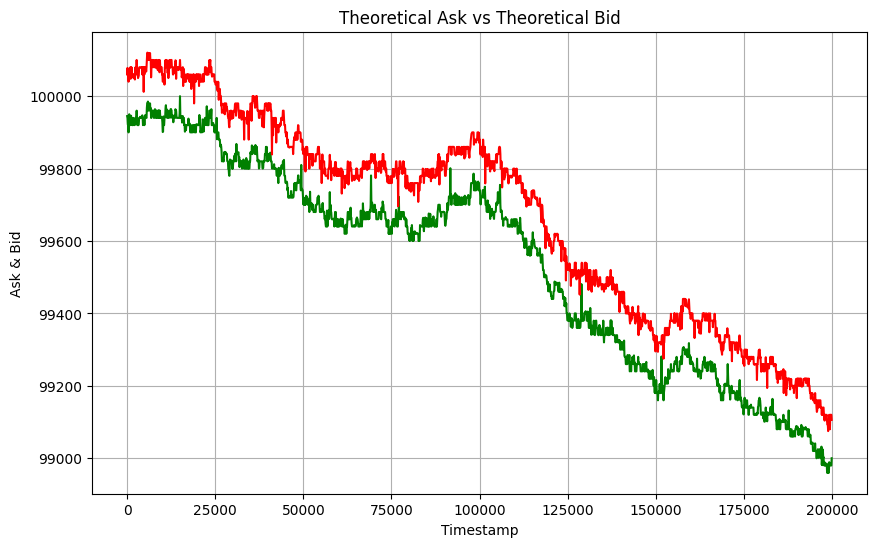

In [7]:
def calculate_value(row, price_prefix, volume_prefix):
    price_1 = row.get(f'{price_prefix}_price_1', 0) or 0
    volume_1 = row.get(f'{volume_prefix}_volume_1', 0) or 0
    price_2 = row.get(f'{price_prefix}_price_2', 0) or 0
    volume_2 = row.get(f'{volume_prefix}_volume_2', 0) or 0
    value = price_1 * min(volume_1, 20)
    if volume_1 < 20:
        value += price_2 * (20 - volume_1)
    return value
starfruit_data['calculated_bid_value'] = starfruit_data.apply(lambda row: calculate_value(row, 'bid', 'bid'), axis=1)
starfruit_data['calculated_ask_value'] = starfruit_data.apply(lambda row: calculate_value(row, 'ask', 'ask'), axis=1)
starfruit_data.to_csv('starfruit_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['calculated_bid_value'], color='green')
plt.plot(starfruit_data.index, starfruit_data['calculated_ask_value'], color='red')
plt.title('Theoretical Ask vs Theoretical Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()

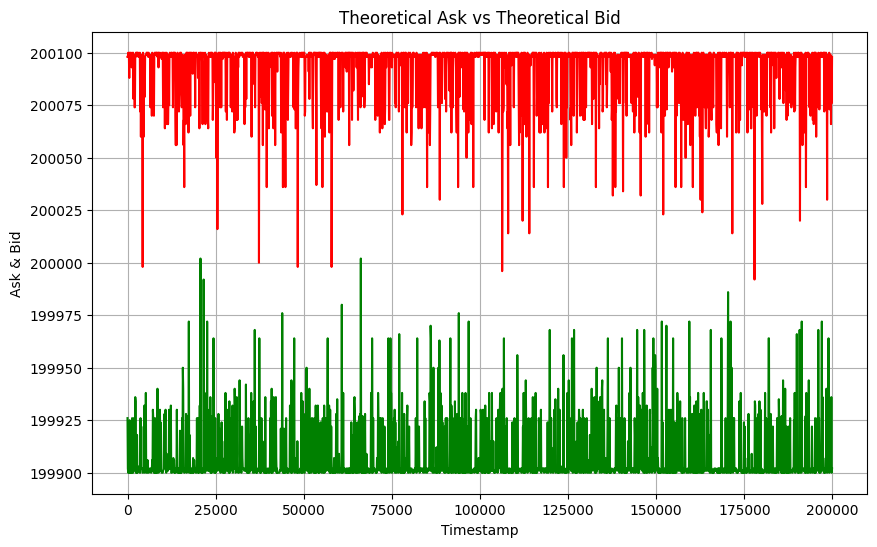

In [8]:
def calculate_value(row, price_prefix, volume_prefix):
    price_1 = row.get(f'{price_prefix}_price_1', 0) or 0
    volume_1 = row.get(f'{volume_prefix}_volume_1', 0) or 0
    price_2 = row.get(f'{price_prefix}_price_2', 0) or 0
    volume_2 = row.get(f'{volume_prefix}_volume_2', 0) or 0
    value = price_1 * min(volume_1, 20)
    if volume_1 < 20:
        value += price_2 * (20 - volume_1)
    return value
amethysts_data['calculated_bid_value'] = amethysts_data.apply(lambda row: calculate_value(row, 'bid', 'bid'), axis=1)
amethysts_data['calculated_ask_value'] = amethysts_data.apply(lambda row: calculate_value(row, 'ask', 'ask'), axis=1)
amethysts_data.to_csv('amethysts_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['calculated_bid_value'], color='green')
plt.plot(amethysts_data.index, amethysts_data['calculated_ask_value'], color='red')
plt.title('Theoretical Ask vs Theoretical Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()

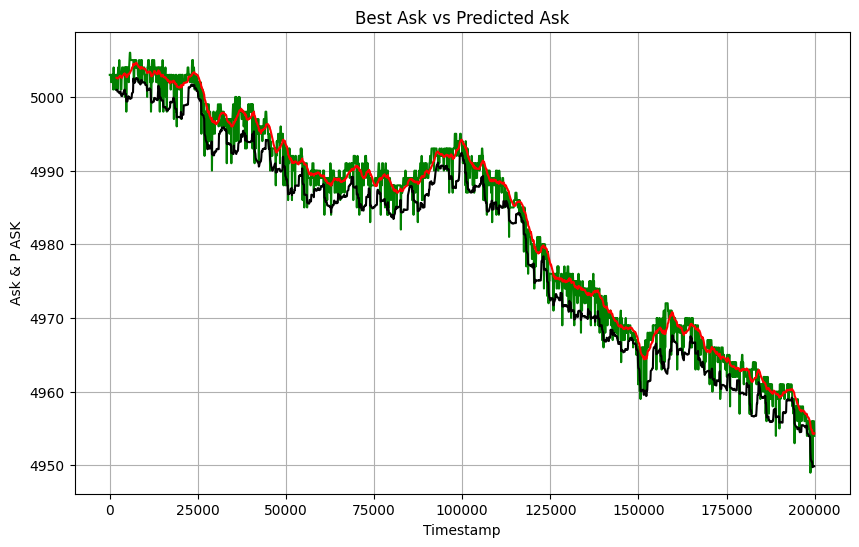

In [9]:
window_size = 20
starfruit_data['ask_price_1_rolling_mean'] = starfruit_data['ask_price_1'].rolling(window=window_size).mean()
starfruit_data['ask_price_1_rolling_std'] = starfruit_data['ask_price_1'].rolling(window=window_size).std()
starfruit_data['ask_price_1_lower_band'] = starfruit_data['ask_price_1_rolling_mean'] - (starfruit_data['ask_price_1_rolling_std'] * 2.0)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['ask_price_1_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['ask_price_1_lower_band'], color='black')
plt.title('Best Ask vs Predicted Ask')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

timestamp
0                 NaN
100               NaN
200               NaN
300               NaN
400               NaN
             ...     
199500    4952.330780
199600    4952.135861
199700    4952.069108
199800    4952.069108
199900    4952.135861
Name: bid_price_1_upper_band, Length: 2000, dtype: float64


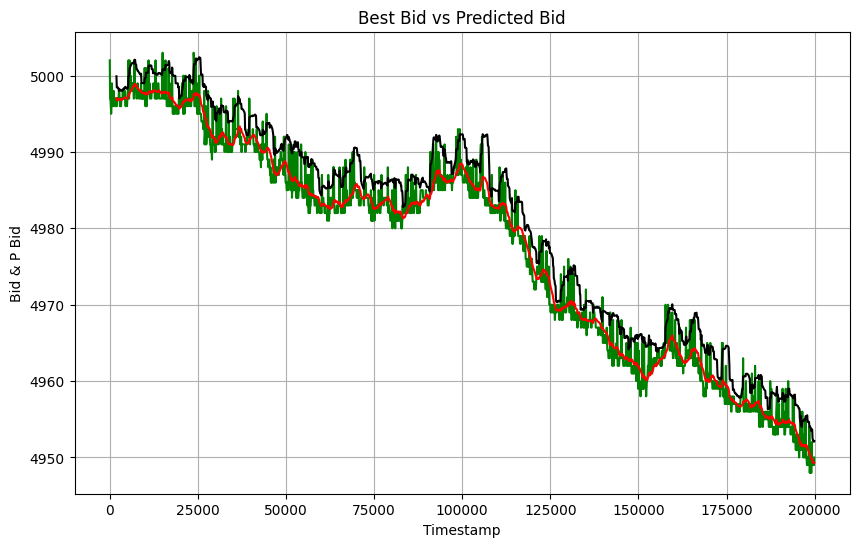

In [10]:
window_size = 20
starfruit_data['bid_price_1_rolling_mean'] = starfruit_data['bid_price_1'].rolling(window=window_size).mean()
starfruit_data['bid_price_1_rolling_std'] = starfruit_data['bid_price_1'].rolling(window=window_size).std()
starfruit_data['bid_price_1_upper_band'] = starfruit_data['bid_price_1_rolling_mean'] + (starfruit_data['bid_price_1_rolling_std'] * 2.0)
print(starfruit_data['bid_price_1_upper_band'])

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['bid_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1_upper_band'], color='black')
plt.title('Best Bid vs Predicted Bid')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming starfruit_data is already defined and includes necessary columns
starfruit_data.fillna(0, inplace=True)  # Replace NaN volumes with zeros

# Calculate rolling mean (fair value) for each bid and ask price level, ignoring zeros
window_size = 20
for i in range(1, 4):
    bid_prices = starfruit_data[f'bid_price_{i}']
    ask_prices = starfruit_data[f'ask_price_{i}']
    bid_rolling_mean = bid_prices.rolling(window=window_size).apply(lambda x: np.mean(np.ma.masked_equal(x, 0)))
    ask_rolling_mean = ask_prices.rolling(window=window_size).apply(lambda x: np.mean(np.ma.masked_equal(x, 0)))
    starfruit_data[f'bid_price_{i}_rolling_mean'] = bid_rolling_mean
    starfruit_data[f'ask_price_{i}_rolling_mean'] = ask_rolling_mean

trade_log = []  # Initialize trade log
position_open = False
position_type = None
position_level = None  # Track the level of the current position for more informed closing decisions

for timestamp, row in starfruit_data.iterrows():
    best_action = None
    best_price = 0
    best_shares = 0
    best_level = None
    best_deviation = 0

    # Calculate deviations and determine the best trading opportunity
    for level in range(1, 4):
        bid_price = row[f'bid_price_{level}']
        ask_price = row[f'ask_price_{level}']
        bid_volume = row[f'bid_volume_{level}']
        ask_volume = row[f'ask_volume_{level}']
        bid_rolling_mean = row[f'bid_price_{level}_rolling_mean']
        ask_rolling_mean = row[f'ask_price_{level}_rolling_mean']

        bid_deviation = (bid_price - bid_rolling_mean) / bid_rolling_mean if bid_rolling_mean > 0 else 0
        ask_deviation = (ask_price - ask_rolling_mean) / ask_rolling_mean if ask_rolling_mean > 0 else 0

        # Evaluate bid and ask opportunities
        if abs(bid_deviation) > abs(best_deviation):
            best_deviation = bid_deviation
            best_action = 'Short'
            best_price = bid_price
            best_level = level
            best_shares = min(bid_volume, 20)  # Restrict shares to available volume or 20

        if abs(ask_deviation) > abs(best_deviation):
            best_deviation = ask_deviation
            best_action = 'Long'
            best_price = ask_price
            best_level = level
            best_shares = min(ask_volume, 20)  # Restrict shares to available volume or 20

    # Adjusting the threshold for opening positions
    open_threshold = 2.0  # Increased base threshold

    # Trading decision based on the best opportunity
    if best_action and not position_open and abs(best_deviation) > open_threshold:
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': best_action,
            'Level': best_level,
            'Shares': 1,
            'Price': best_price,
        })
        position_open = True
        position_type = best_action
        position_level = best_level

    elif position_open and position_level == best_level:
        # Adjusting the threshold for closing positions, if necessary
        close_threshold = 2.0  # You can adjust this threshold separately if desired

        if (best_action != position_type and abs(best_deviation) > close_threshold):
            trade_log.append({
                'Date': timestamp,
                'Action': 'Close Position',
                'Type': position_type,
                'Level': position_level,
                'Shares': 1,  # Assuming closing the full position
                'Price': best_price,
            })
            position_open = False
            position_type = None
            position_level = None

    # Printing for debugging
    print(f"Timestamp: {timestamp}, Position: {position_open}, Best Action: {best_action}, Best Price: {best_price}, Best Level: {best_level}, Best Deviation: {best_deviation}")

# Correction: Close the quote in 'position_type' assignment for 'Short'
# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')
import matplotlib.pyplot as plt

# Assuming the trade_log and starfruit_data are already defined and filled

# Convert trade_log to DataFrame for easier handling
trade_log_df = pd.DataFrame(trade_log)

import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Iterate through each level (1, 2, 3)
for level in range(1, 4):
    row_index = level - 1

    # Check if data exists for bids, asks, rolling means, and Bollinger bands
    if f'bid_price_{level}' in starfruit_data.columns and f'ask_price_{level}' in starfruit_data.columns \
        and f'bid_price_{level}_rolling_mean' in starfruit_data.columns and f'ask_price_{level}_rolling_mean' in starfruit_data.columns:

        # Plot bids, asks, rolling means, and Bollinger bands
        axs[row_index].plot(starfruit_data.index, starfruit_data[f'bid_price_{level}'], label=f'Bid Price {level}', color='blue')
        axs[row_index].plot(starfruit_data.index, starfruit_data[f'ask_price_{level}'], label=f'Ask Price {level}', color='orange')
        axs[row_index].plot(starfruit_data.index, starfruit_data[f'bid_price_{level}_rolling_mean'], label=f'Bid Rolling Mean {level}', color='green')
        axs[row_index].plot(starfruit_data.index, starfruit_data[f'ask_price_{level}_rolling_mean'], label=f'Ask Rolling Mean {level}', color='red')

        # Check if Bollinger bands exist before plotting
        if f'bid_price_{level}_lower_band' in starfruit_data.columns and f'bid_price_{level}_upper_band' in starfruit_data.columns:
            axs[row_index].fill_between(starfruit_data.index, starfruit_data[f'bid_price_{level}_lower_band'], starfruit_data[f'bid_price_{level}_upper_band'], color='gray', alpha=0.3, label=f'Bid Bollinger Bands {level}')
        if f'ask_price_{level}_lower_band' in starfruit_data.columns and f'ask_price_{level}_upper_band' in starfruit_data.columns:
            axs[row_index].fill_between(starfruit_data.index, starfruit_data[f'ask_price_{level}_lower_band'], starfruit_data[f'ask_price_{level}_upper_band'], color='gray', alpha=0.3, label=f'Ask Bollinger Bands {level}')

        axs[row_index].set_title(f'Level {level} Prices and Rolling Means with Bollinger Bands')
        axs[row_index].set_xlabel('Timestamp')
        axs[row_index].set_ylabel('Price')
        axs[row_index].legend()

plt.tight_layout()
plt.show()

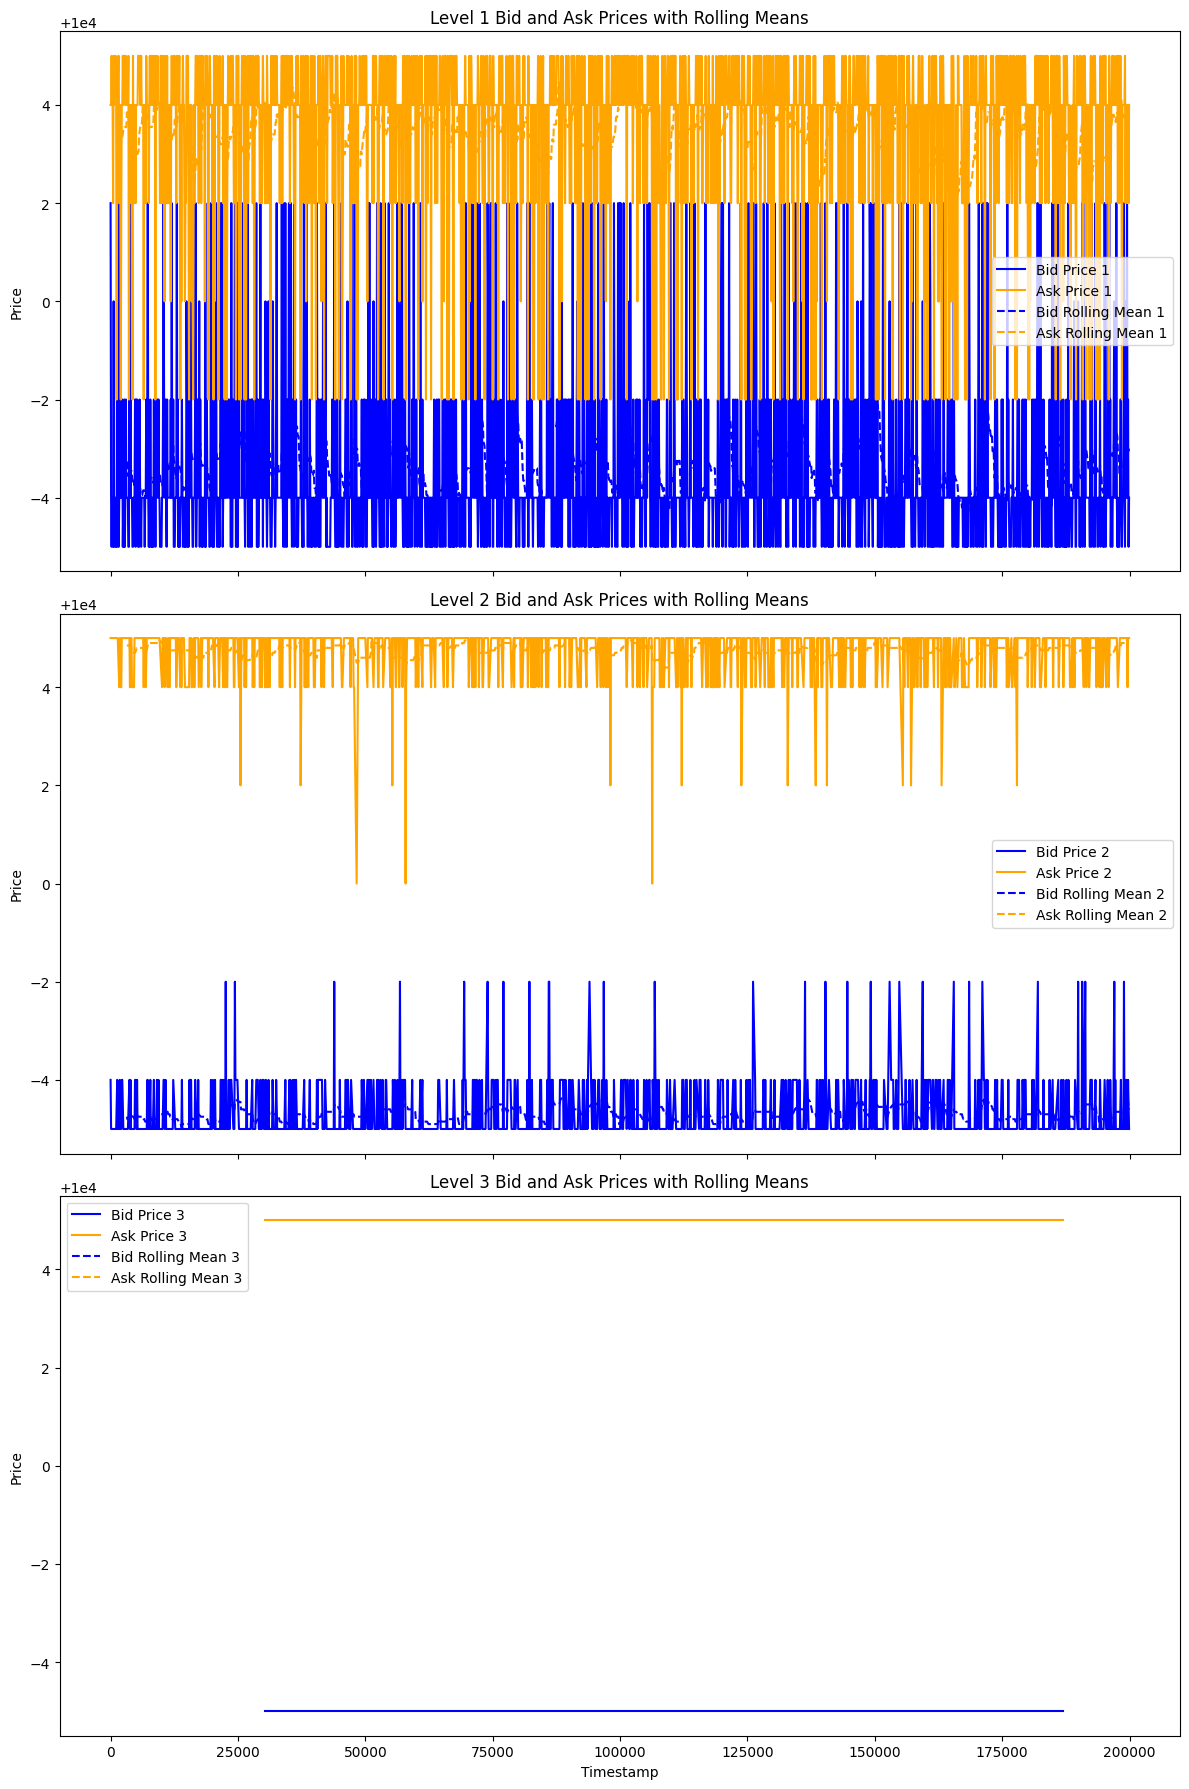

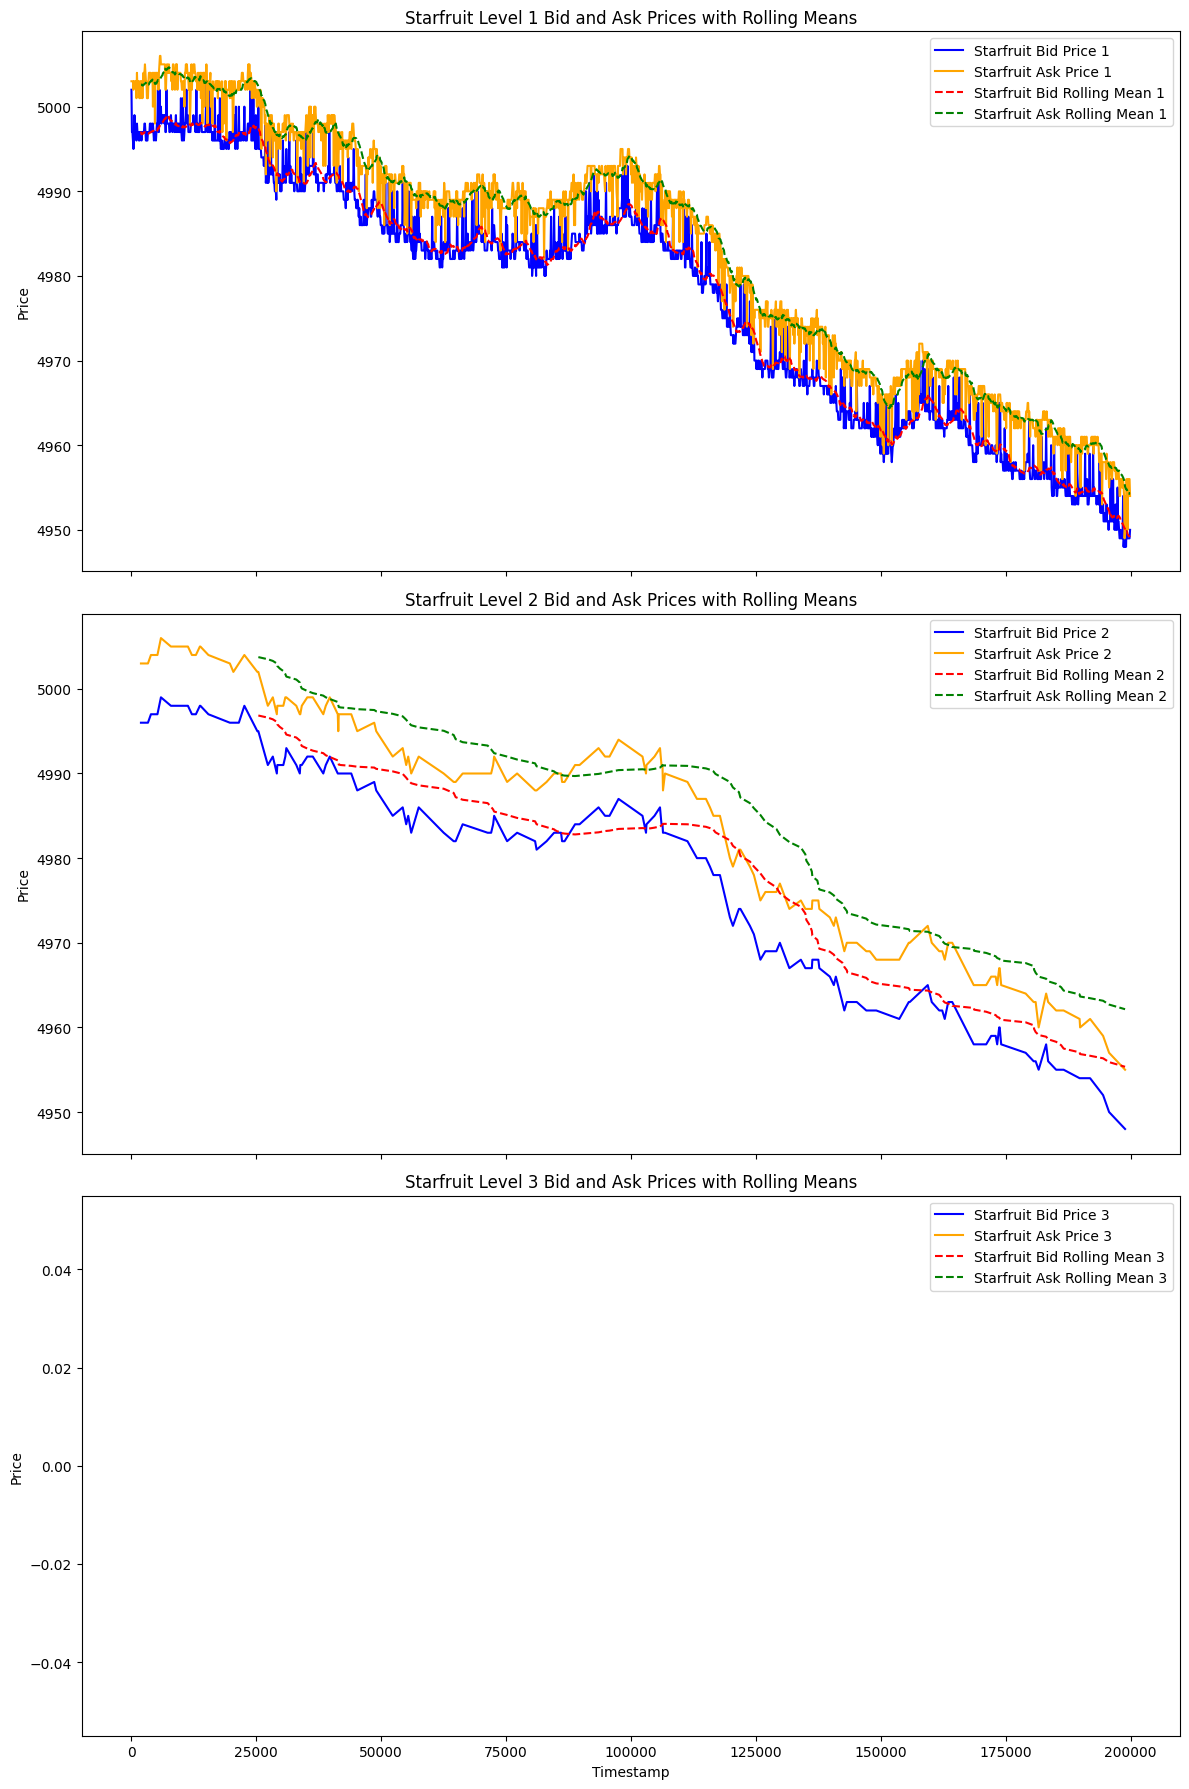

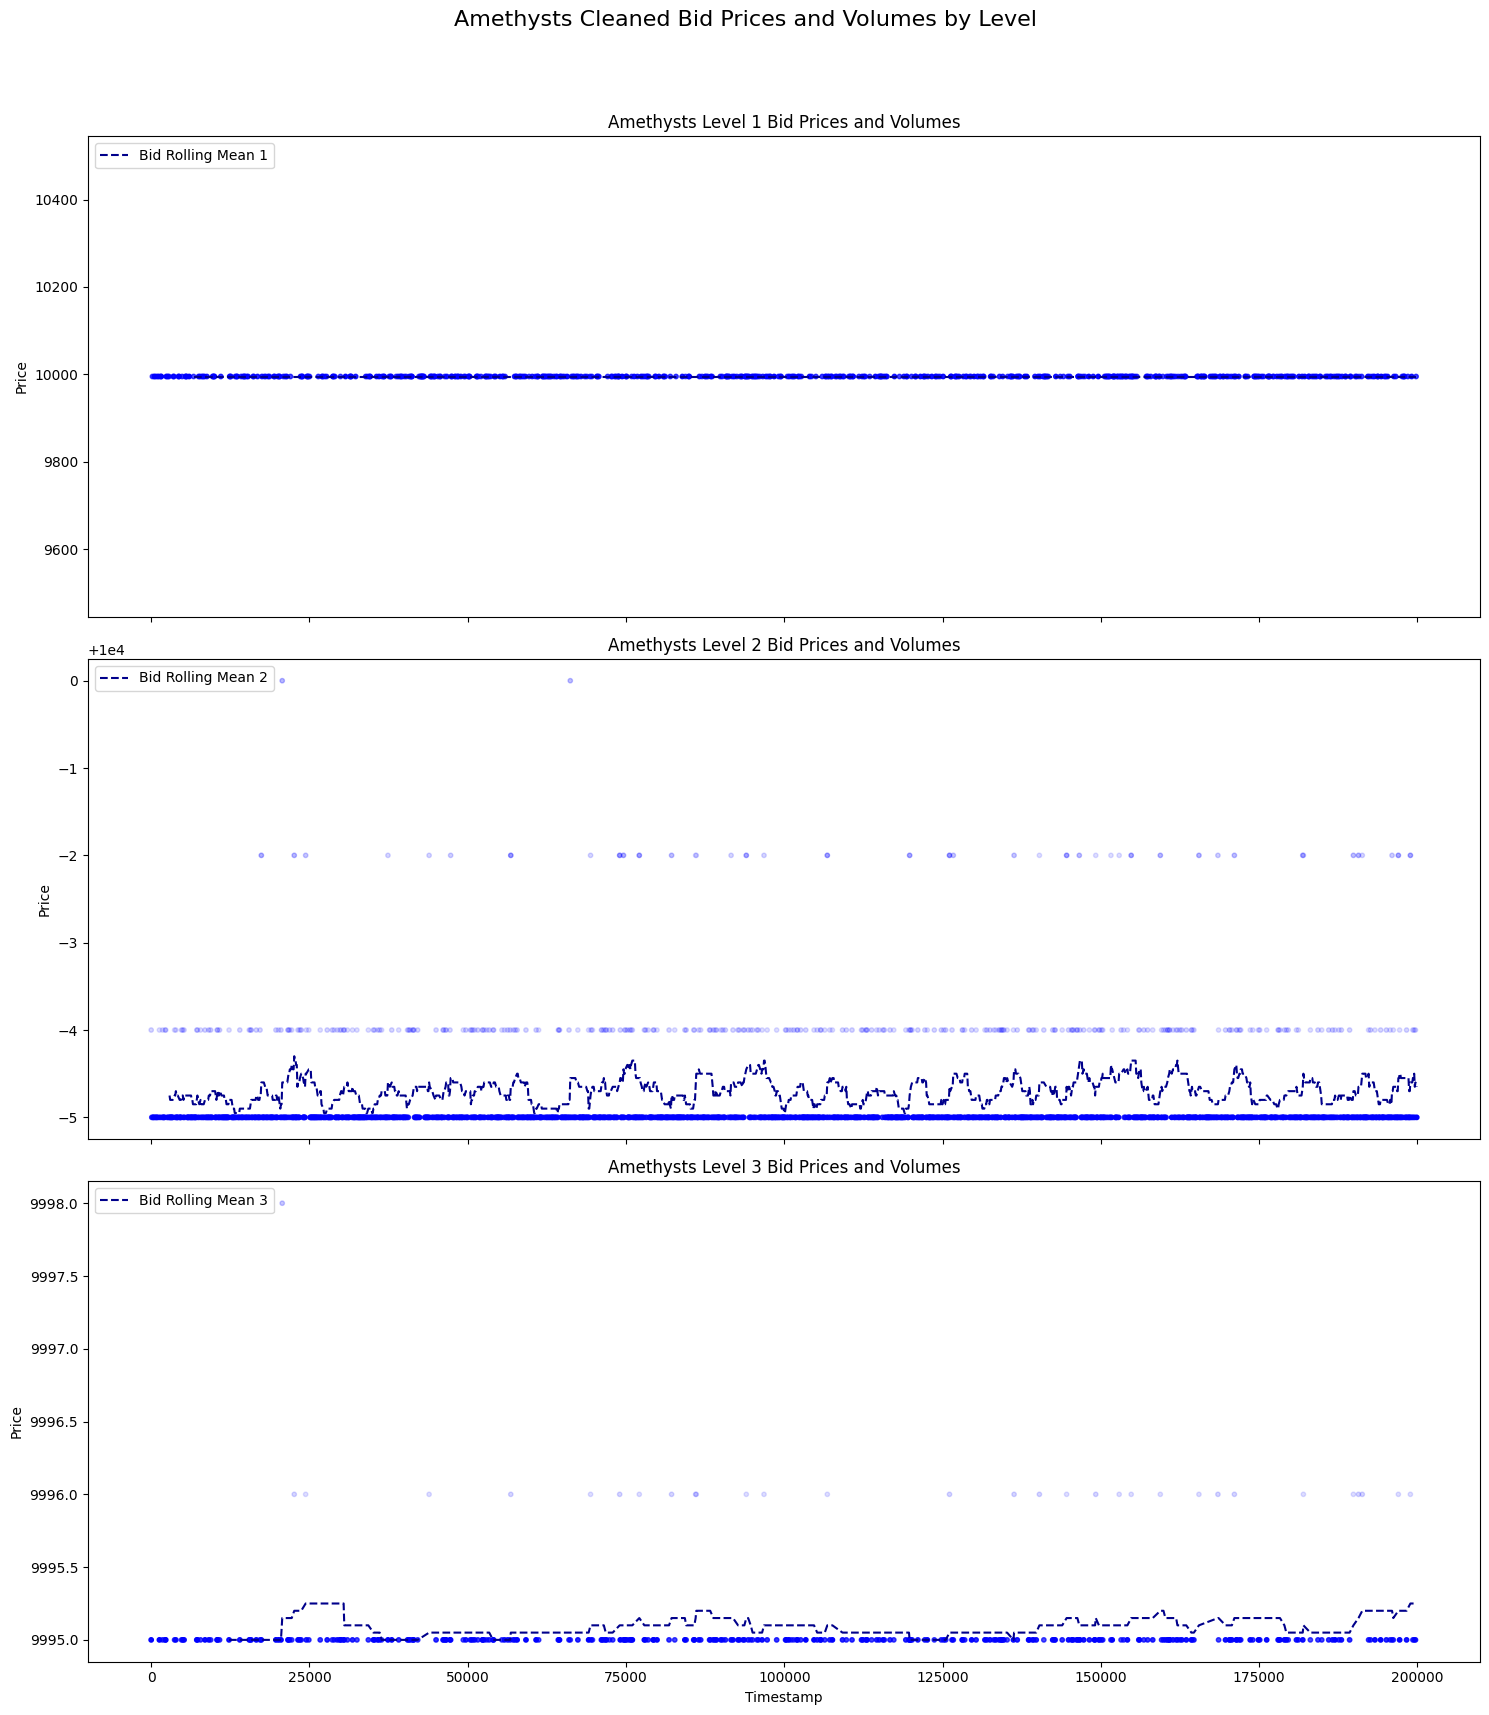

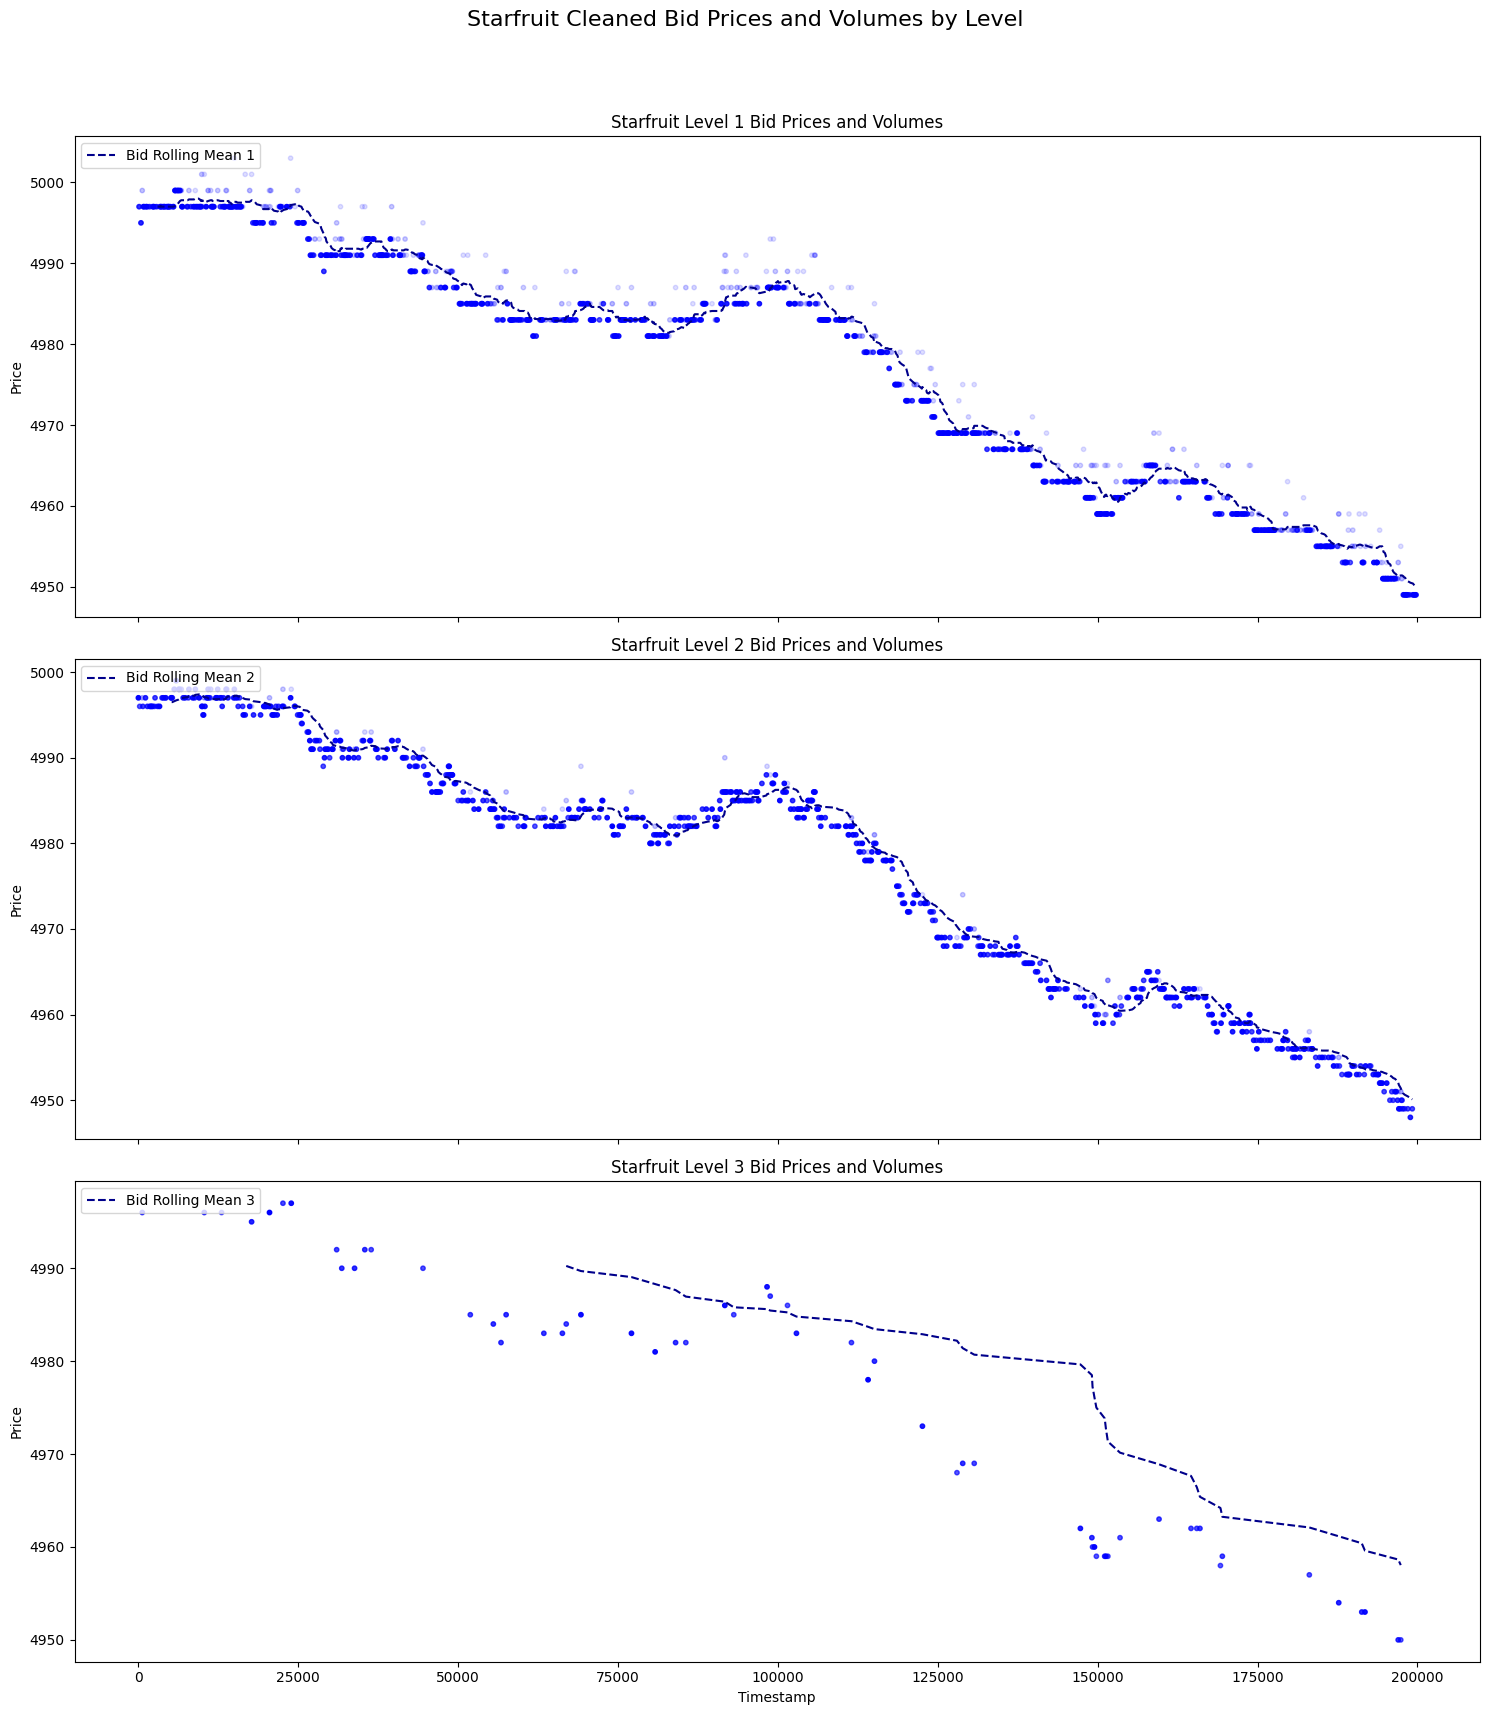

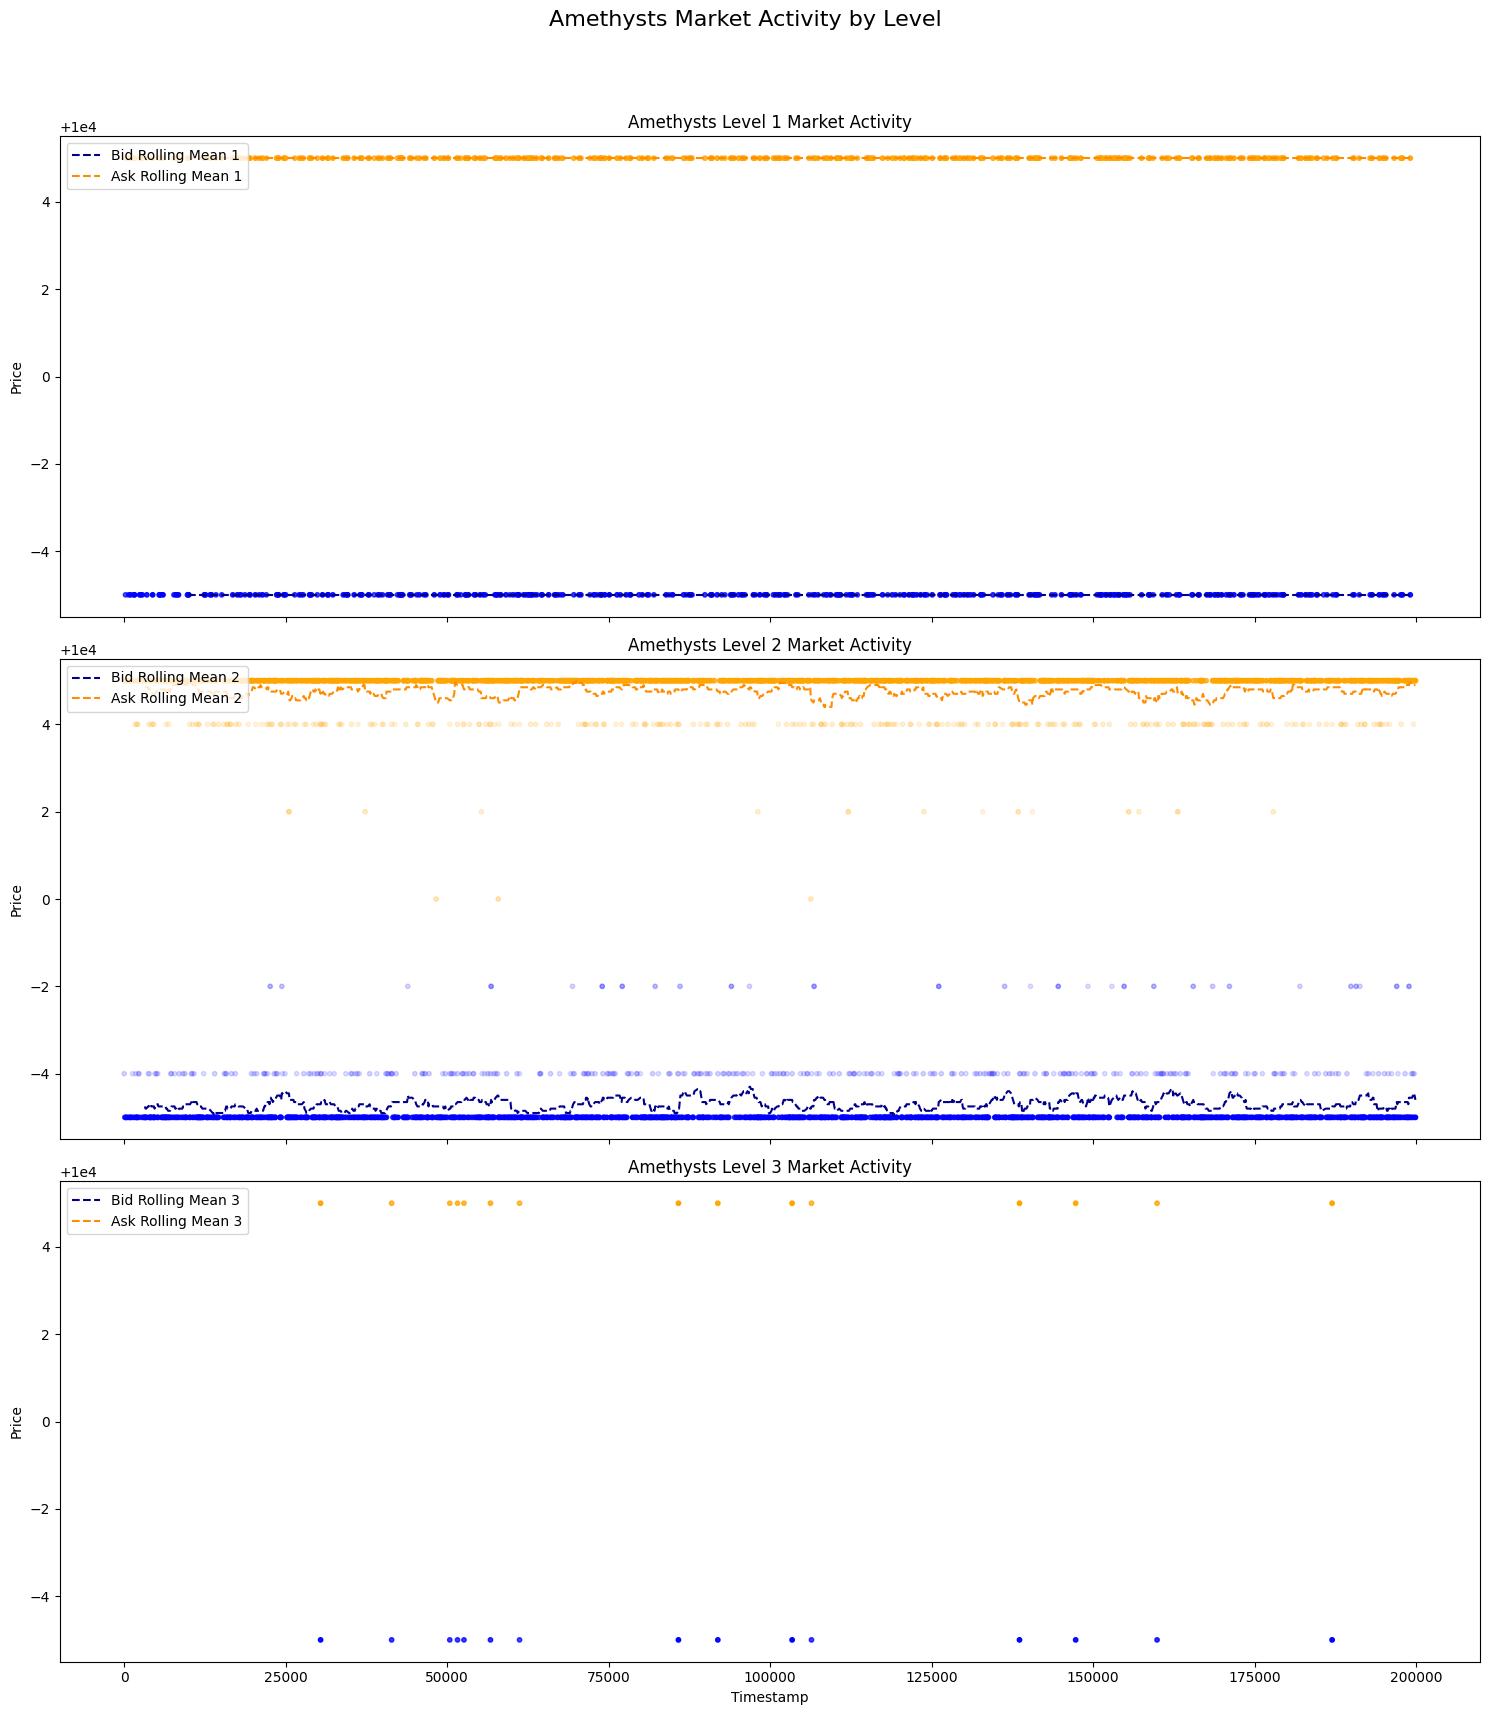

No data to plot for Starfruit at price level 3.


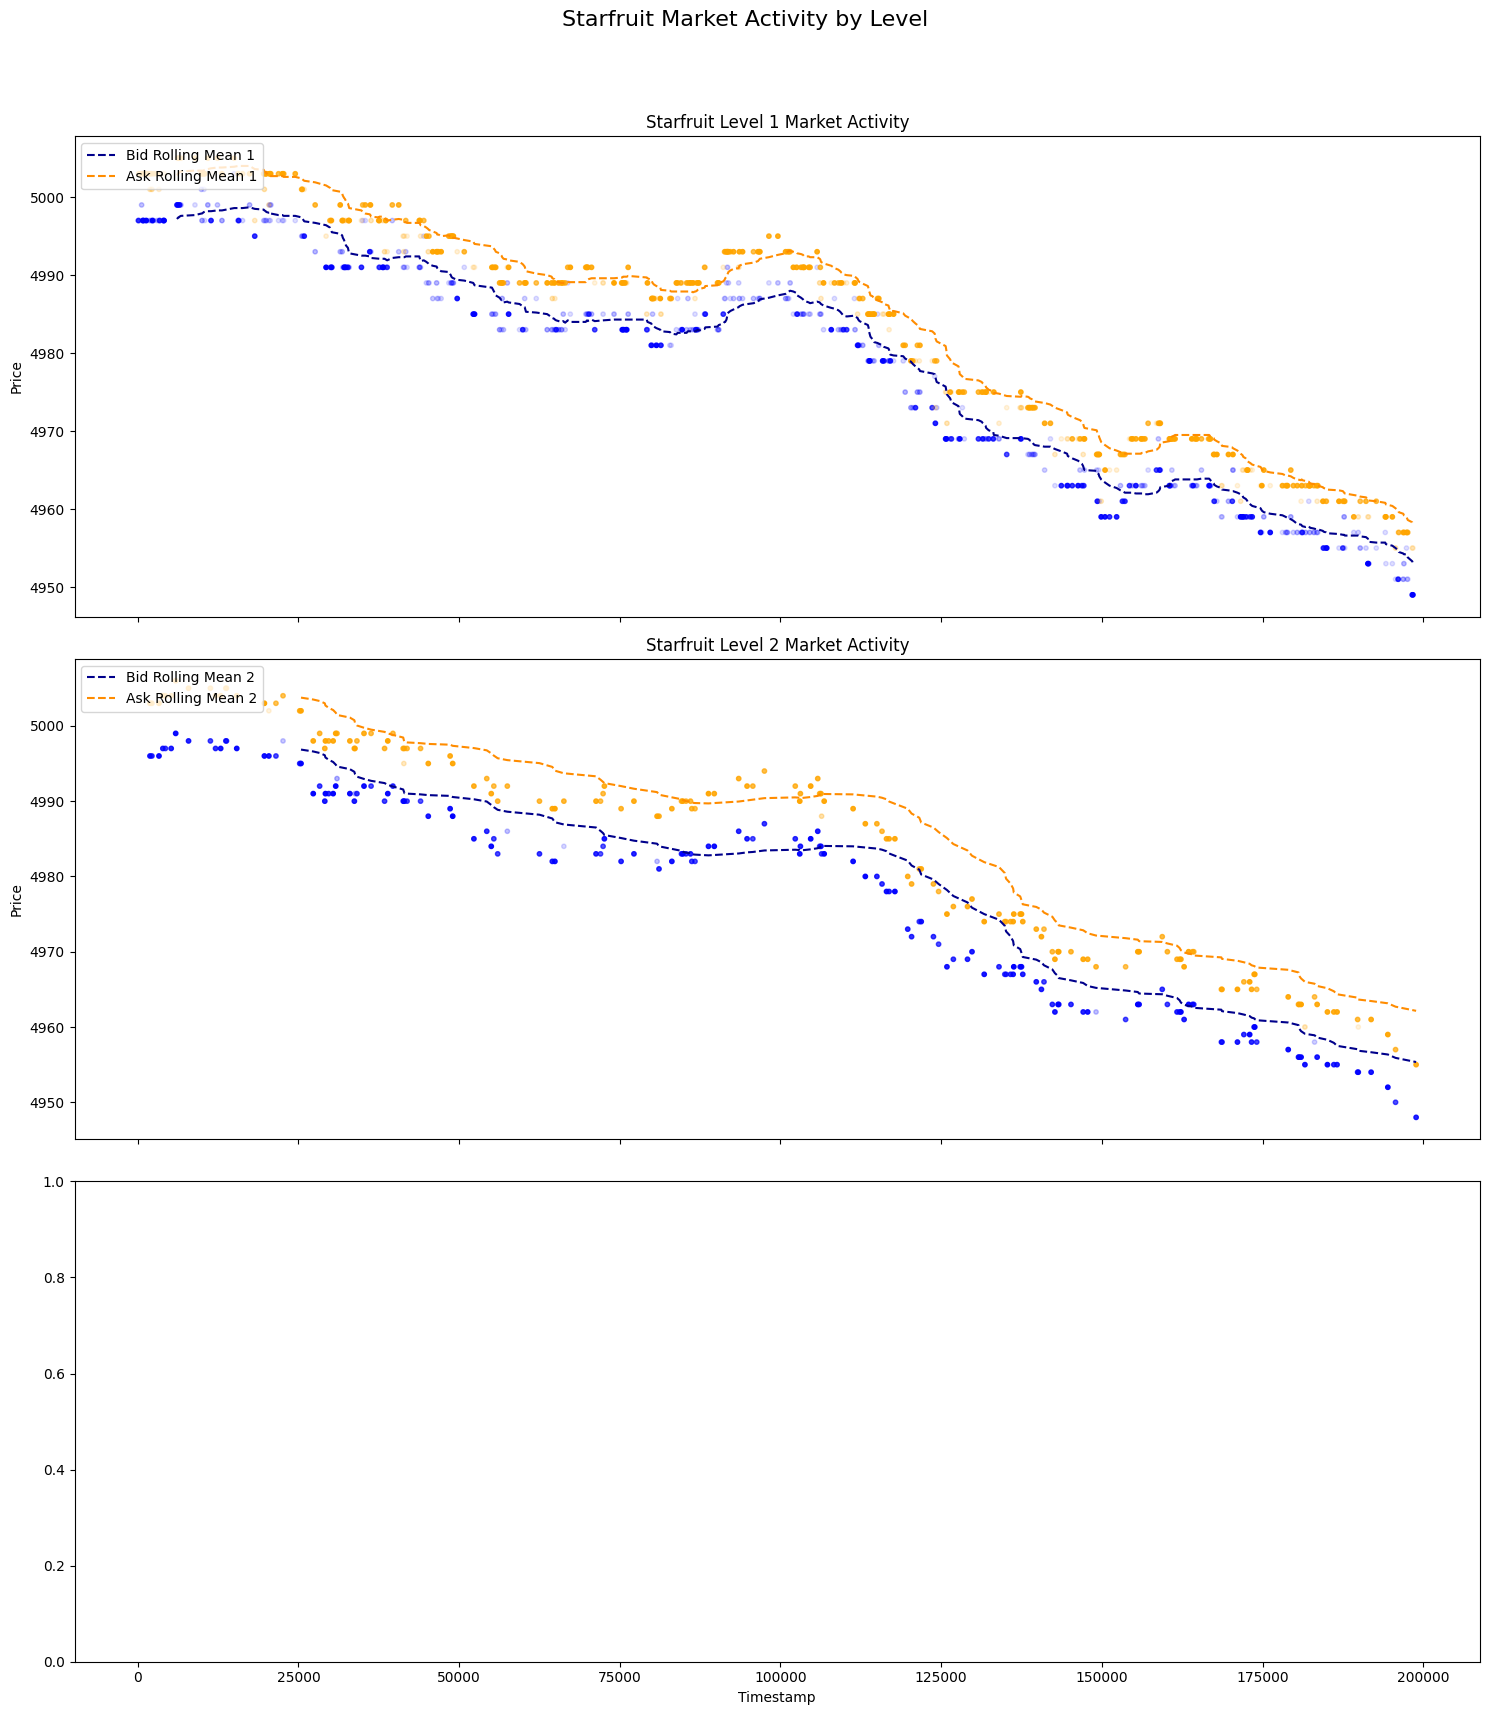

In [27]:
# For Amethysts
import pandas as pd
import numpy as np

# Assuming amathysts_data is already defined and includes necessary columns
amethysts_data.fillna(0, inplace=True)  # Replace NaN volumes with zeros

# Calculate rolling mean (fair value) for each bid and ask price level, ignoring zeros
window_size = 20
for i in range(1, 4):
    bid_prices = amethysts_data[f'bid_price_{i}']
    ask_prices = amethysts_data[f'ask_price_{i}']
    bid_rolling_mean = bid_prices.rolling(window=window_size).apply(lambda x: np.mean(np.ma.masked_equal(x, 0)))
    ask_rolling_mean = ask_prices.rolling(window=window_size).apply(lambda x: np.mean(np.ma.masked_equal(x, 0)))
    amethysts_data[f'bid_price_{i}_rolling_mean'] = bid_rolling_mean
    amethysts_data[f'ask_price_{i}_rolling_mean'] = ask_rolling_mean

trade_log = []  # Initialize trade log
position_open = False
position_type = None
position_level = None  # Track the level of the current position for more informed closing decisions

for timestamp, row in amethysts_data.iterrows():
    best_action = None
    best_price = 0
    best_shares = 0
    best_level = None
    best_deviation = 0

    # Calculate deviations and determine the best trading opportunity
    for level in range(1, 4):
        bid_price = row[f'bid_price_{level}']
        ask_price = row[f'ask_price_{level}']
        bid_volume = row[f'bid_volume_{level}']
        ask_volume = row[f'ask_volume_{level}']
        bid_rolling_mean = row[f'bid_price_{level}_rolling_mean']
        ask_rolling_mean = row[f'ask_price_{level}_rolling_mean']

        bid_deviation = (bid_price - bid_rolling_mean) / bid_rolling_mean if bid_rolling_mean > 0 else 0
        ask_deviation = (ask_price - ask_rolling_mean) / ask_rolling_mean if ask_rolling_mean > 0 else 0

        # Evaluate bid and ask opportunities
        if abs(bid_deviation) > abs(best_deviation):
            best_deviation = bid_deviation
            best_action = 'Short'
            best_price = bid_price
            best_level = level
            best_shares = min(bid_volume, 20)  # Restrict shares to available volume or 20

        if abs(ask_deviation) > abs(best_deviation):
            best_deviation = ask_deviation
            best_action = 'Long'
            best_price = ask_price
            best_level = level
            best_shares = min(ask_volume, 20)  # Restrict shares to available volume or 20

    # Adjusting the threshold for opening positions
    open_threshold = 2.0  # Increased base threshold

    # Trading decision based on the best opportunity
    if best_action and not position_open and abs(best_deviation) > open_threshold:
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': best_action,
            'Level': best_level,
            'Shares': 1,
            'Price': best_price,
        })
        position_open = True
        position_type = best_action
        position_level = best_level

    elif position_open and position_level == best_level:
        # Adjusting the threshold for closing positions, if necessary
        close_threshold = 2.0  # You can adjust this threshold separately if desired

        if (best_action != position_type and abs(best_deviation) > close_threshold):
            trade_log.append({
                'Date': timestamp,
                'Action': 'Close Position',
                'Type': position_type,
                'Level': position_level,
                'Shares': 1,  # Assuming closing the full position
                'Price': best_price,
            })
            position_open = False
            position_type = None
            position_level = None

    # Printing for debugging
    # print(f"Timestamp: {timestamp}, Position: {position_open}, Best Action: {best_action}, Best Price: {best_price}, Best Level: {best_level}, Best Deviation: {best_deviation}")

# Correction: Close the quote in 'position_type' assignment for 'Short'
# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')



















import matplotlib.pyplot as plt

# Window size for rolling mean
window_size = 20

# Create a figure for 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for level in range(1, 4):
    ax = axs[level - 1]

    # Apply filtering to exclude zeros for the current level
    filtered_data = amethysts_data[(amethysts_data[f'bid_price_{level}'] != 0) & (amethysts_data[f'ask_price_{level}'] != 0)]

    # Plot bid and ask prices
    ax.plot(filtered_data.index, filtered_data[f'bid_price_{level}'], label=f'Bid Price {level}', color='blue')
    ax.plot(filtered_data.index, filtered_data[f'ask_price_{level}'], label=f'Ask Price {level}', color='orange')

    # Calculate and plot rolling means for bid and ask prices
    bid_rolling_mean = filtered_data[f'bid_price_{level}'].rolling(window=window_size).mean()
    ask_rolling_mean = filtered_data[f'ask_price_{level}'].rolling(window=window_size).mean()

    ax.plot(filtered_data.index, bid_rolling_mean, label=f'Bid Rolling Mean {level}', color='blue', linestyle='--')
    ax.plot(filtered_data.index, ask_rolling_mean, label=f'Ask Rolling Mean {level}', color='orange', linestyle='--')

    # Enhance each subplot
    ax.set_title(f'Level {level} Bid and Ask Prices with Rolling Means')
    ax.set_ylabel('Price')
    ax.legend()

# Set common xlabel
axs[-1].set_xlabel('Timestamp')

plt.tight_layout()
plt.show()



















import matplotlib.pyplot as plt

# Assuming starfruit_data is already defined and includes necessary columns
# Example of preparing starfruit_data similar to amethysts_data might have been done prior

# Window size for rolling mean
window_size = 20

# Create a figure for 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for level in range(1, 4):
    ax = axs[level - 1]

    # Apply filtering to exclude zeros for the current level in starfruit_data
    filtered_data = starfruit_data[(starfruit_data[f'bid_price_{level}'] != 0) & (starfruit_data[f'ask_price_{level}'] != 0)]

    # Plot bid and ask prices for starfruit
    ax.plot(filtered_data.index, filtered_data[f'bid_price_{level}'], label=f'Starfruit Bid Price {level}', color='blue')
    ax.plot(filtered_data.index, filtered_data[f'ask_price_{level}'], label=f'Starfruit Ask Price {level}', color='orange')

    # Calculate and plot rolling means for bid and ask prices for starfruit
    bid_rolling_mean = filtered_data[f'bid_price_{level}'].rolling(window=window_size).mean()
    ask_rolling_mean = filtered_data[f'ask_price_{level}'].rolling(window=window_size).mean()

    ax.plot(filtered_data.index, bid_rolling_mean, label=f'Starfruit Bid Rolling Mean {level}', color='red', linestyle='--')
    ax.plot(filtered_data.index, ask_rolling_mean, label=f'Starfruit Ask Rolling Mean {level}', color='green', linestyle='--')

    # Enhance each subplot
    ax.set_title(f'Starfruit Level {level} Bid and Ask Prices with Rolling Means')
    ax.set_ylabel('Price')
    ax.legend()

# Set common xlabel
axs[-1].set_xlabel('Timestamp')

plt.tight_layout()
plt.show()







# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming amethysts_data and starfruit_data are already defined and include necessary columns

# products = {
#     "Amethysts": amethysts_data,
#     "Starfruit": starfruit_data
# }

# window_size = 20  # Window size for rolling mean
# min_opacity = 0.1  # Ensure that even the smallest volume is somewhat visible
# opacity_scale = 0.9  # Scale opacity up to this value

# for product_name, data in products.items():
#     fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

#     for level in range(1, 4):
#         ax = axs[level - 1]

#         # Normalize volume for opacity calculation (alpha values)
#         max_volume = np.max(data[f'bid_volume_{level}'])
#         normalized_opacity = min_opacity + (data[f'bid_volume_{level}'] / max_volume * opacity_scale)

#         # Plot bid price as a line plot
#         # ax.plot(data.index, data[f'bid_price_{level}'], label=f'Bid Price {level}', color='blue', alpha=0.5)

#         # Overlay with a scatter plot representing volume
#         ax.scatter(data.index, data[f'bid_price_{level}'], alpha=normalized_opacity, color='blue', s=10)  # s is the size of the dot

#         # Calculate and plot rolling mean for bid price
#         bid_rolling_mean = data[f'bid_price_{level}'].rolling(window=window_size).mean()
#         ax.plot(data.index, bid_rolling_mean, label=f'Bid Rolling Mean {level}', color='darkblue', linestyle='--')

#         ax.set_title(f'{product_name} Level {level} Bid Prices and Volumes')
#         ax.set_ylabel('Price')
#         ax.legend(loc='upper left')

#     # Set common xlabel for the last subplot
#     axs[-1].set_xlabel('Timestamp')
#     plt.suptitle(f'{product_name} Uncleaned, 0-Distorted Bid Prices and Volumes by Level', fontsize=16)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the global title
#     plt.show()
















import matplotlib.pyplot as plt
import numpy as np

# Assuming amethysts_data and starfruit_data are already defined and include necessary columns

products = {
    "Amethysts": amethysts_data,
    "Starfruit": starfruit_data
}

window_size = 20  # Window size for rolling mean

for product_name, data in products.items():
    fig, axs = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

    for level in range(1, 4):
        ax = axs[level - 1]

        # Filter out rows where bid or ask price is zero or NaN for the current level
        filtered_data = data[(data[f'bid_price_{level}'].notna() & data[f'bid_price_{level}'] != 0)]

        # Normalize volume for opacity calculation (alpha values)
        max_volume = filtered_data[f'bid_volume_{level}'].max()
        min_opacity = 0.1  # Ensure even the smallest volume is somewhat visible
        opacity_scale = 0.9  # Scale opacity up to this value
        normalized_opacity = min_opacity + (filtered_data[f'bid_volume_{level}'] / max_volume * opacity_scale)

        # Plot bid price as a line plot
        # ax.plot(filtered_data.index, filtered_data[f'bid_price_{level}'], label=f'Bid Price {level}', color='blue', alpha=0.5)

        # Overlay with a scatter plot representing volume
        ax.scatter(filtered_data.index, filtered_data[f'bid_price_{level}'], alpha=normalized_opacity, color='blue', s=10)  # s is the size of the dot

        # Calculate and plot rolling mean for bid price, ensuring to only consider non-zero and non-NaN values
        bid_rolling_mean = filtered_data[f'bid_price_{level}'].rolling(window=window_size).mean()
        ax.plot(filtered_data.index, bid_rolling_mean, label=f'Bid Rolling Mean {level}', color='darkblue', linestyle='--')

        ax.set_title(f'{product_name} Level {level} Bid Prices and Volumes')
        ax.set_ylabel('Price')
        ax.legend(loc='upper left')

    # Set common xlabel for the last subplot
    axs[-1].set_xlabel('Timestamp')
    plt.suptitle(f'{product_name} Cleaned Bid Prices and Volumes by Level', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the global title
    plt.show()











import matplotlib.pyplot as plt
import numpy as np

# Assuming amethysts_data and starfruit_data are prepared with necessary columns

products = {
    "Amethysts": amethysts_data,
    "Starfruit": starfruit_data
}

window_size = 20  # Window size for rolling mean
min_opacity = 0.1  # Ensure even the smallest volume is somewhat visible
opacity_scale = 0.9  # Scale opacity up to this value

for product_name, data in products.items():
    fig, axs = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

    for level in range(1, 4):
        ax = axs[level - 1]

        # Filter out rows where bid or ask price is zero or NaN for the current level
        filtered_data = data[(data[f'bid_price_{level}'].notna() & data[f'bid_price_{level}'] != 0) &
                              (data[f'ask_price_{level}'].notna() & data[f'ask_price_{level}'] != 0)]

        if not filtered_data.empty:
            # Normalization of volume for opacity calculation, with checks to avoid division by zero
            max_bid_volume = max(filtered_data[f'bid_volume_{level}'].max(), 1)  # Avoid division by zero
            max_ask_volume = max(filtered_data[f'ask_volume_{level}'].max(), 1)

            normalized_bid_opacity = min_opacity + (filtered_data[f'bid_volume_{level}'] / max_bid_volume * opacity_scale)
            normalized_ask_opacity = min_opacity + (filtered_data[f'ask_volume_{level}'] / max_ask_volume * opacity_scale)

            # Plot bid and ask prices as line plots
            # ax.plot(filtered_data.index, filtered_data[f'bid_price_{level}'], label=f'Bid Price {level}', color='blue', alpha=0.5)
            # ax.plot(filtered_data.index, filtered_data[f'ask_price_{level}'], label=f'Ask Price {level}', color='orange', alpha=0.5)

            # Overlay with scatter plots representing volumes for both bid and ask
            ax.scatter(filtered_data.index, filtered_data[f'bid_price_{level}'], alpha=normalized_bid_opacity, color='blue', s=10)
            ax.scatter(filtered_data.index, filtered_data[f'ask_price_{level}'], alpha=normalized_ask_opacity, color='orange', s=10)

            # Calculate and plot rolling means for bid and ask prices
            bid_rolling_mean = filtered_data[f'bid_price_{level}'].rolling(window=window_size).mean()
            ask_rolling_mean = filtered_data[f'ask_price_{level}'].rolling(window=window_size).mean()
            ax.plot(filtered_data.index, bid_rolling_mean, label=f'Bid Rolling Mean {level}', color='darkblue', linestyle='--')
            ax.plot(filtered_data.index, ask_rolling_mean, label=f'Ask Rolling Mean {level}', color='darkorange', linestyle='--')

            ax.set_title(f'{product_name} Level {level} Market Activity')
            ax.set_ylabel('Price')
            ax.legend(loc='upper left')
        else:
            print(f"No data to plot for {product_name} at price level {level}.")

    # Set common xlabel for the last subplot
    axs[-1].set_xlabel('Timestamp')
    plt.suptitle(f'{product_name} Market Activity by Level', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()







In [13]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']

        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print(i)

Total return from strategy: -2019.0
206


In [14]:
profit_loss_df = pd.read_csv('returns.csv')

daily_returns = profit_loss_df['Profit/Loss'] / 5000

average_daily_return = daily_returns.mean()

annual_risk_free_rate = 0.02

daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

excess_daily_returns = daily_returns - daily_risk_free_rate

std_dev_excess_daily_returns = excess_daily_returns.std()

sharpe_ratio = (excess_daily_returns.mean() / std_dev_excess_daily_returns) * (252 ** 0.5)

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: -436.4161899764406


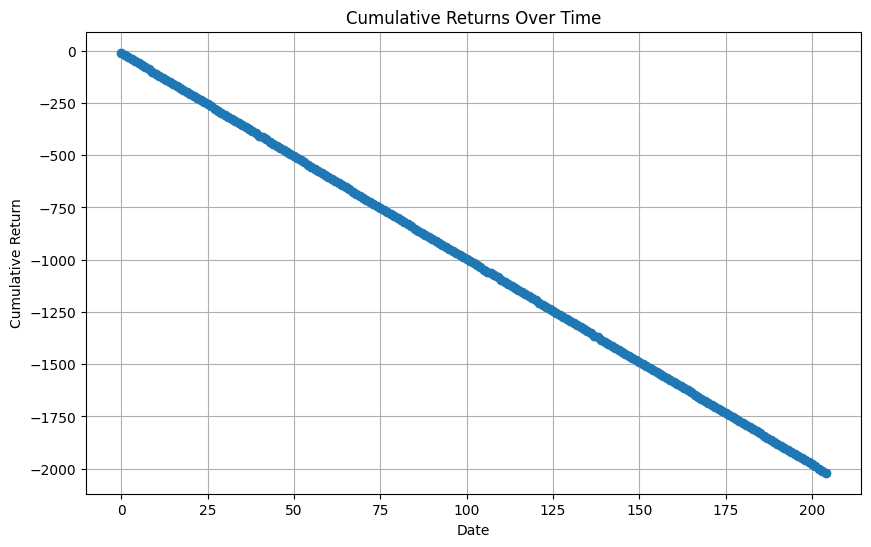

In [15]:
# Calculate cumulative returns
profit_loss_df['Cumulative Return'] = profit_loss_df['Profit/Loss'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df['Cumulative Return'], marker='o')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [16]:
order_quantity = min(abs(-40), abs(-50), 19)
print(order_quantity)

19


In [17]:
print(-abs(order_quantity))

-19
